In [1]:
%matplotlib inline
import pandas as pd
import xmltodict
import pickle
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gexf = "./input_data/dynamic_network.gexf"

In [3]:
# Converting to Gexf to Dict
with open(gexf) as fd:
    root = xmltodict.parse(fd.read())

graph = root['ns0:gexf']['ns0:graph']
nodes = graph['ns0:nodes']

print 'Number of nodes in the graph: ', len(nodes['ns0:node'])

Number of nodes in the graph:  2520


In [4]:
listofNodes = nodes['ns0:node']

In [5]:
# Collecting attributes from the graph and generating a new dictionary with that
dictNodesStartPlan = dict()
for node in listofNodes:
    start_plan_date = ""
    dropout = ""
    gender = ""
    corp = ""
    country = ""
    bmi = ""
    nodeid = node['@id']
    #print nodeid
    listofAttributes = node['ns0:attvalues']['ns0:attvalue']
    for attrib in listofAttributes:
        (at,value) = attrib.values()
        if int(at) == 1:
            start_plan_date = value
        elif int(at) == 2:
            dropout = value
        elif int(at) == 3:
            gender = value
        elif int(at) == 4:
            corp = value
        elif int(at) == 5:
            country = value
        elif int(at) == 6:
            bmi = value
    d = {'start_plan_date': start_plan_date, 'dropout':dropout, 'gender':gender,
         'corp':corp, 'country':country, 'bmi':bmi}
    dictNodesStartPlan[nodeid] = d

In [6]:
# Convert to DataFrame
df = pd.DataFrame(dictNodesStartPlan)
df = df.T
df['id'] = df.index

#### Generating the graphic for the distribution of dropout nodes

In [7]:
df[df['dropout'] != ""].head()

bmi  corp country     dropout gender start_plan_date     id
11507  28.9811  1185      US  2010-05-07      F      2010-05-10  11507
12491  25.0298   957      NL  2010-05-29      M      2009-12-28  12491
12523  26.5832   925      DE  2010-05-22      M      2010-02-15  12523
12669  29.9383   925      DE  2010-06-30      M      2010-03-15  12669
14465  24.1221  1185      US  2010-06-03      M      2010-05-10  14465

In [8]:
initial_date = pd.to_datetime('2010-04-28')
initial_date

Timestamp('2010-04-28 00:00:00')

In [9]:
df['initial_date'] = initial_date
df.head()

bmi  corp country dropout gender start_plan_date     id  \
10005  32.1929   517      US              M      2009-05-25  10005   
10013  32.6905  1053      US              F      2010-04-26  10013   
10023  29.8394   579      NL              M      2009-11-16  10023   
10025  23.5898   321      US              M      2009-07-13  10025   
10091  20.9042   471      US              F      2010-01-04  10091   

      initial_date  
10005   2010-04-28  
10013   2010-04-28  
10023   2010-04-28  
10025   2010-04-28  
10091   2010-04-28

In [10]:
df['dropout'] = pd.to_datetime(df['dropout'])

In [11]:
df['dropout (days)'] = df['dropout'] - df['initial_date']

In [12]:
df.head()

bmi  corp country dropout gender start_plan_date     id  \
10005  32.1929   517      US     NaT      M      2009-05-25  10005   
10013  32.6905  1053      US     NaT      F      2010-04-26  10013   
10023  29.8394   579      NL     NaT      M      2009-11-16  10023   
10025  23.5898   321      US     NaT      M      2009-07-13  10025   
10091  20.9042   471      US     NaT      F      2010-01-04  10091   

      initial_date  dropout (days)  
10005   2010-04-28             NaT  
10013   2010-04-28             NaT  
10023   2010-04-28             NaT  
10025   2010-04-28             NaT  
10091   2010-04-28             NaT

In [13]:
df[~pd.isnull(df['dropout'])].head()

bmi  corp country    dropout gender start_plan_date     id  \
11507  28.9811  1185      US 2010-05-07      F      2010-05-10  11507   
12491  25.0298   957      NL 2010-05-29      M      2009-12-28  12491   
12523  26.5832   925      DE 2010-05-22      M      2010-02-15  12523   
12669  29.9383   925      DE 2010-06-30      M      2010-03-15  12669   
14465  24.1221  1185      US 2010-06-03      M      2010-05-10  14465   

      initial_date  dropout (days)  
11507   2010-04-28          9 days  
12491   2010-04-28         31 days  
12523   2010-04-28         24 days  
12669   2010-04-28         63 days  
14465   2010-04-28         36 days

In [14]:
df.loc[pd.isnull(df['dropout (days)']),'dropout (days)'] = pd.to_timedelta('0 days')
df.head()

bmi  corp country dropout gender start_plan_date     id  \
10005  32.1929   517      US     NaT      M      2009-05-25  10005   
10013  32.6905  1053      US     NaT      F      2010-04-26  10013   
10023  29.8394   579      NL     NaT      M      2009-11-16  10023   
10025  23.5898   321      US     NaT      M      2009-07-13  10025   
10091  20.9042   471      US     NaT      F      2010-01-04  10091   

      initial_date  dropout (days)  
10005   2010-04-28          0 days  
10013   2010-04-28          0 days  
10023   2010-04-28          0 days  
10025   2010-04-28          0 days  
10091   2010-04-28          0 days

In [15]:
df[df['dropout (days)'] != pd.to_timedelta('0 days')].head(10)

bmi  corp country    dropout gender start_plan_date     id  \
11507  28.9811  1185      US 2010-05-07      F      2010-05-10  11507   
12491  25.0298   957      NL 2010-05-29      M      2009-12-28  12491   
12523  26.5832   925      DE 2010-05-22      M      2010-02-15  12523   
12669  29.9383   925      DE 2010-06-30      M      2010-03-15  12669   
14465  24.1221  1185      US 2010-06-03      M      2010-05-10  14465   
15065  30.4705   903      US 2010-06-11      F      2009-11-30  15065   
16007  23.7387  1053      US 2010-05-21      M      2010-05-03  16007   
16137  25.7122  1121      US 2010-06-29      M      2010-05-10  16137   
16257  38.4438   925      DE 2010-05-21      M      2010-02-08  16257   
16429  32.9067   579      NL 2010-06-26      M      2009-06-22  16429   

      initial_date  dropout (days)  
11507   2010-04-28          9 days  
12491   2010-04-28         31 days  
12523   2010-04-28         24 days  
12669   2010-04-28         63 days  
14465   2010-04-28         36 days  
15065   2010-04-28         44 days  
16007   2010-04-28         23 days  
16137   2010-04-28         62 days  
16257   2010-04-28         23 days  
16429   2010-04-28         59 days

In [16]:
#td_series.astype('timedelta64[D]').astype(int)
df['dropout (days)'] = df['dropout (days)'].astype('timedelta64[D]').astype(int)
df.head()

bmi  corp country dropout gender start_plan_date     id  \
10005  32.1929   517      US     NaT      M      2009-05-25  10005   
10013  32.6905  1053      US     NaT      F      2010-04-26  10013   
10023  29.8394   579      NL     NaT      M      2009-11-16  10023   
10025  23.5898   321      US     NaT      M      2009-07-13  10025   
10091  20.9042   471      US     NaT      F      2010-01-04  10091   

      initial_date  dropout (days)  
10005   2010-04-28               0  
10013   2010-04-28               0  
10023   2010-04-28               0  
10025   2010-04-28               0  
10091   2010-04-28               0

In [17]:
rows_dropout = df[~pd.isnull(df['dropout'])]
len(rows_dropout)

73

In [18]:
rows_dropout.head()

bmi  corp country    dropout gender start_plan_date     id  \
11507  28.9811  1185      US 2010-05-07      F      2010-05-10  11507   
12491  25.0298   957      NL 2010-05-29      M      2009-12-28  12491   
12523  26.5832   925      DE 2010-05-22      M      2010-02-15  12523   
12669  29.9383   925      DE 2010-06-30      M      2010-03-15  12669   
14465  24.1221  1185      US 2010-06-03      M      2010-05-10  14465   

      initial_date  dropout (days)  
11507   2010-04-28               9  
12491   2010-04-28              31  
12523   2010-04-28              24  
12669   2010-04-28              63  
14465   2010-04-28              36

In [19]:
days_drop = rows_dropout['dropout (days)']

initial_date = pd.to_datetime('2010-04-28')
df['initial_date'] = initial_date
df['dropout'] = pd.to_datetime(df['dropout'])
df['dropout (days)'] = df['dropout'] - df['initial_date']
df.loc[pd.isnull(df['dropout (days)']),'dropout (days)'] = pd.to_timedelta('0 days')
#td_series.astype('timedelta64[D]').astype(int)
df['dropout (days)'] = df['dropout (days)'].astype('timedelta64[D]').astype(int)
rows_dropout = df[~pd.isnull(df['dropout'])]
days_drop = rows_dropout['dropout (days)']


#days_drop.hist(bins=1)

bins = range(max(days_drop)+1)
#a = np.histogram(days_drop.values, bins=bins)
plt.figure(figsize=(20,12))
plt.title('Drop out days distribution', fontsize=28)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Quantity (nodes)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
a = plt.hist(days_drop.values, bins=bins)
plt.savefig('./imgs/dropout_histogram.png')
#plt.plot(a)

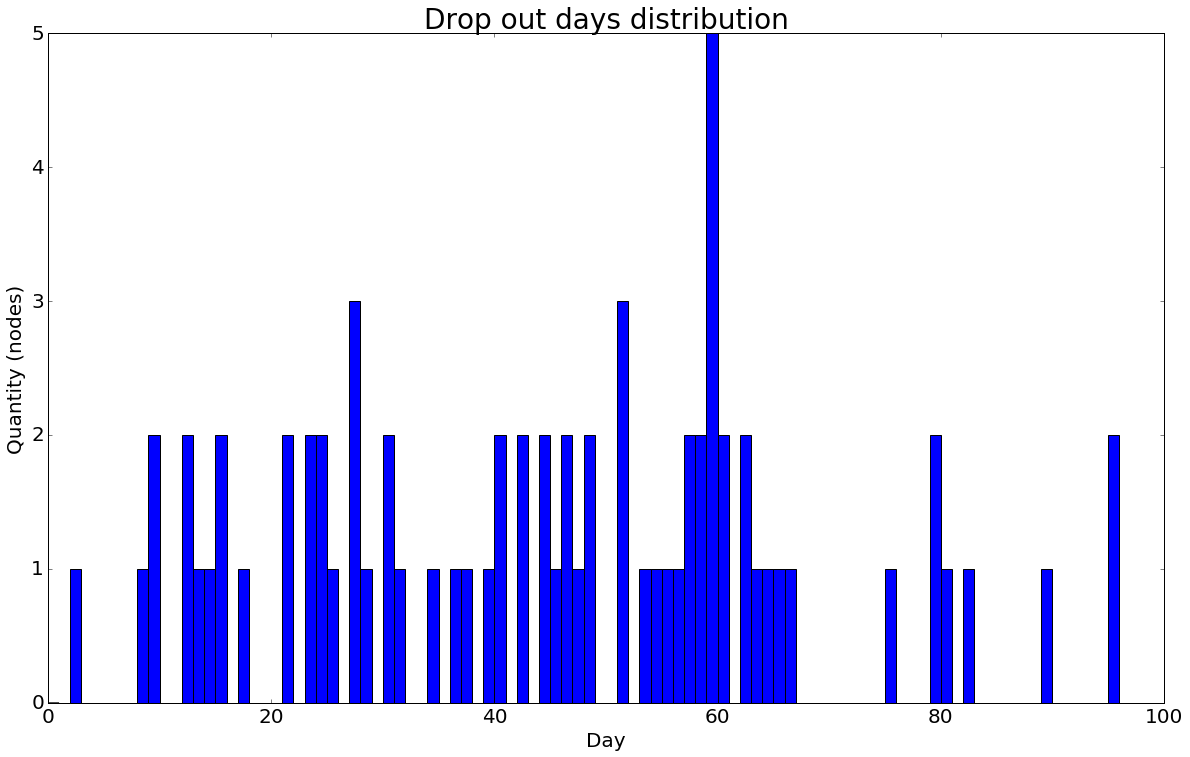

In [20]:
#days_drop.hist(bins=1)

bins = range(max(days_drop)+1)
#a = np.histogram(days_drop.values, bins=bins)
plt.figure(figsize=(20,12))
plt.title('Drop out days distribution', fontsize=28)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Quantity (nodes)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
a = plt.hist(days_drop.values, bins=bins)
plt.savefig('./imgs/dropout_histogram.png')
#plt.plot(a)

In [21]:
sum(a[0])

73.0

In [22]:
max(days_drop)

96

In [23]:
df.columns

Index([u'bmi', u'corp', u'country', u'dropout', u'gender', u'start_plan_date',
       u'id', u'initial_date', u'dropout (days)'],
      dtype='object')

In [24]:
del df['initial_date']

In [25]:
df.head()

bmi  corp country dropout gender start_plan_date     id  \
10005  32.1929   517      US     NaT      M      2009-05-25  10005   
10013  32.6905  1053      US     NaT      F      2010-04-26  10013   
10023  29.8394   579      NL     NaT      M      2009-11-16  10023   
10025  23.5898   321      US     NaT      M      2009-07-13  10025   
10091  20.9042   471      US     NaT      F      2010-01-04  10091   

       dropout (days)  
10005               0  
10013               0  
10023               0  
10025               0  
10091               0

In [26]:
df.to_pickle('./intermediate_data/attributes.pickle')